In [5]:
pip install tabulate

  Using cached tabulate-0.9.0-py3-none-any.whl.metadata (34 kB)
Using cached tabulate-0.9.0-py3-none-any.whl (35 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 789 entries, 0 to 788
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   S._No.        789 non-null    float64
 1   Age           789 non-null    int64  
 2   Sex           789 non-null    float64
 3   RBC           789 non-null    float64
 4   PCV           789 non-null    float64
 5   MCV           789 non-null    float64
 6   MCH           789 non-null    float64
 7   MCHC          789 non-null    float64
 8   RDW           789 non-null    float64
 9   TLC           789 non-null    float64
 10  PLT__per_mm3  789 non-null    float64
 11  HGB           789 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 74.1 KB
None
   S._No.  Age  Sex   RBC   PCV   MCV   MCH  MCHC   RDW    TLC  PLT__per_mm3  \
0     2.0   41  0.0  4.78  44.5  93.1  28.9  31.0  13.0   7.02         419.0   
1     3.0   40  1.0  4.65  41.6  89.5  28.8  32.2  13.0   8.09         325.0

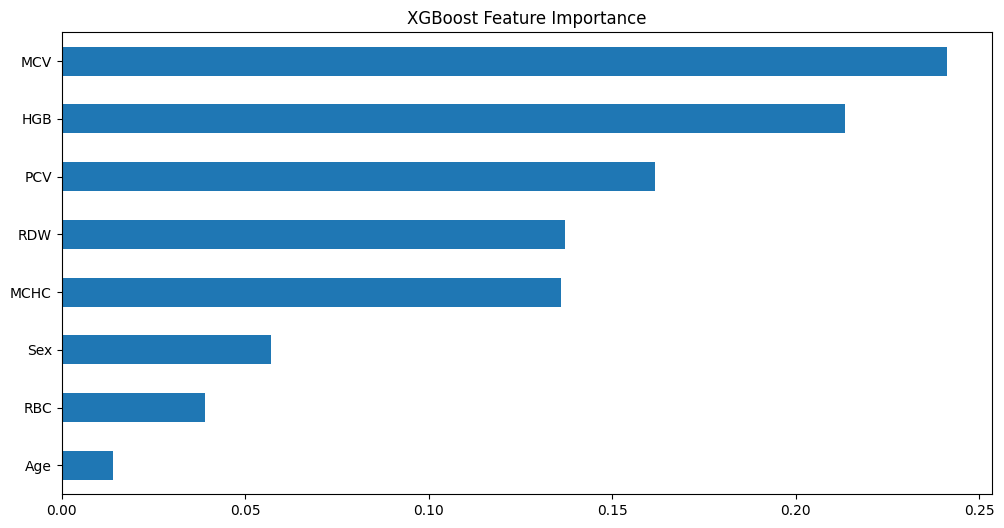

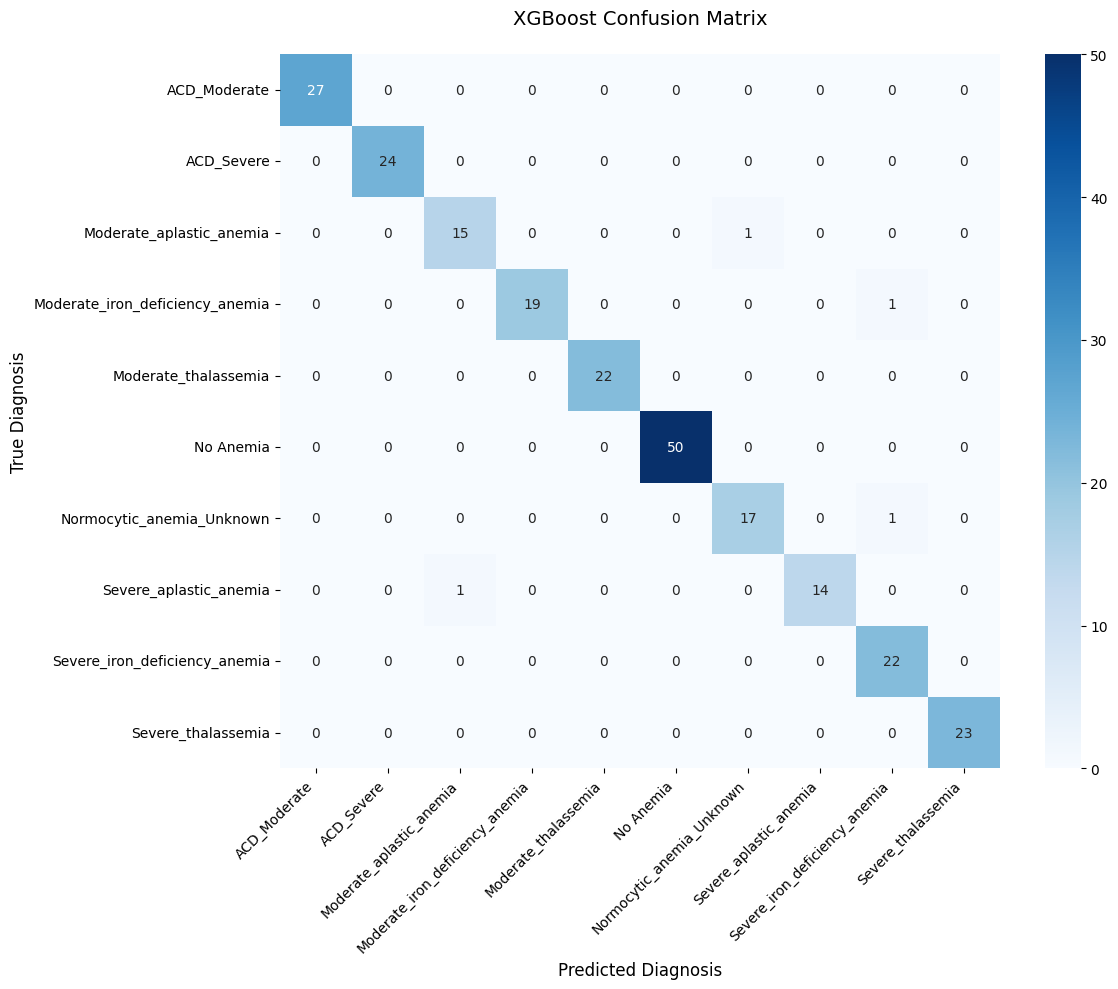

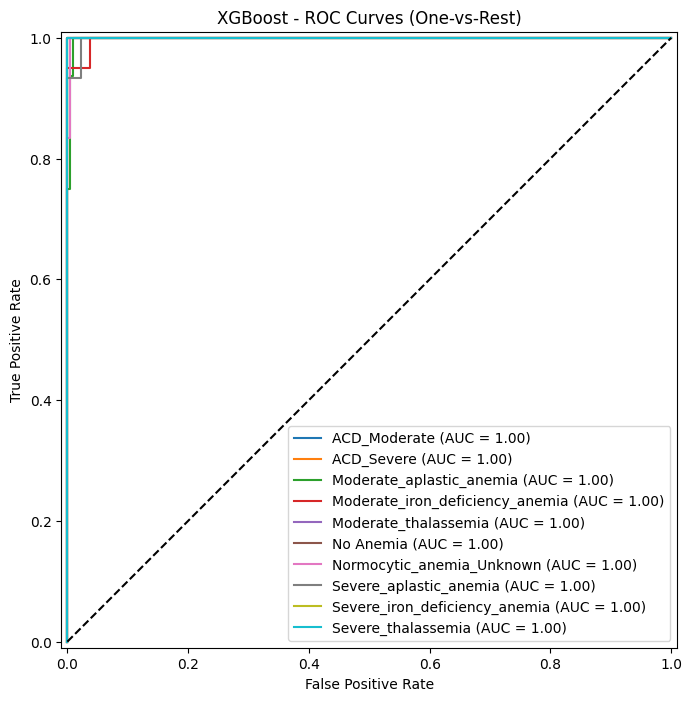


Training Random Forest


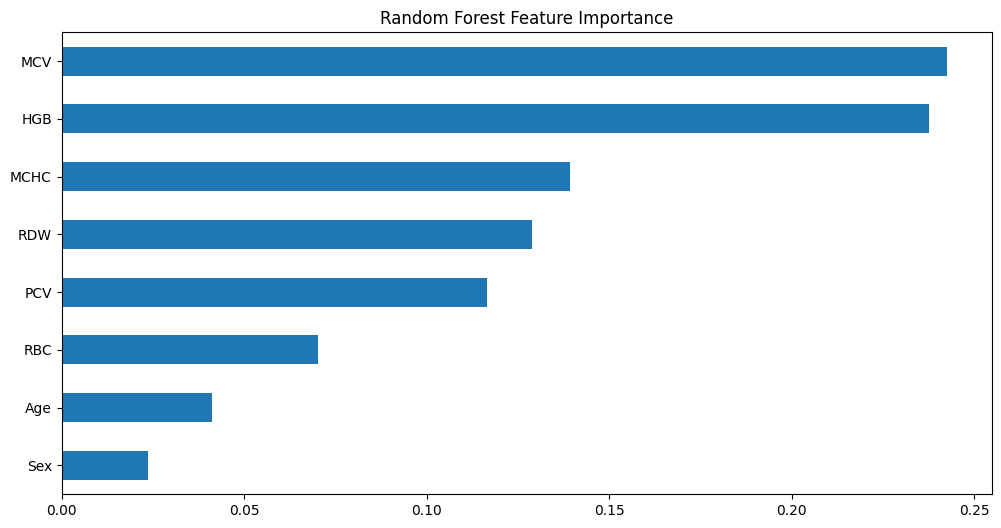

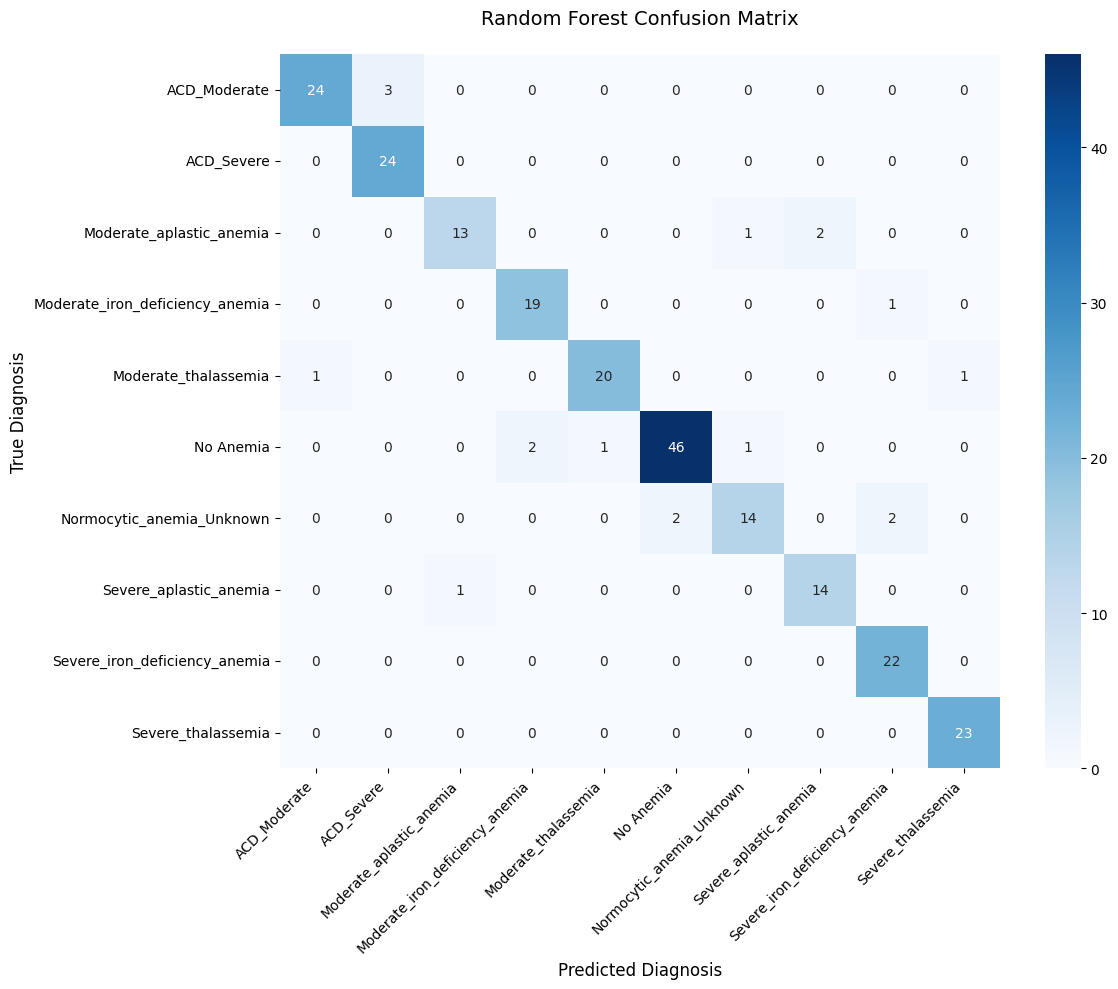

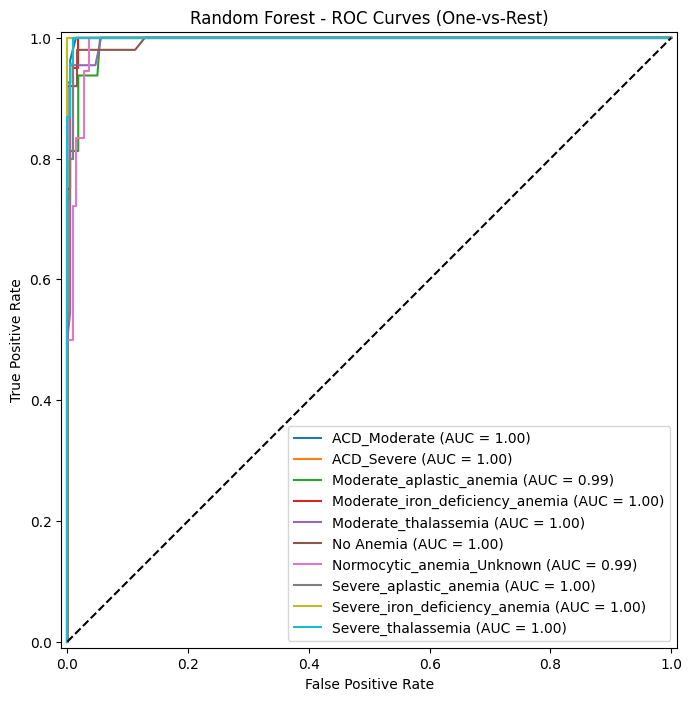


Training Logistic Regression


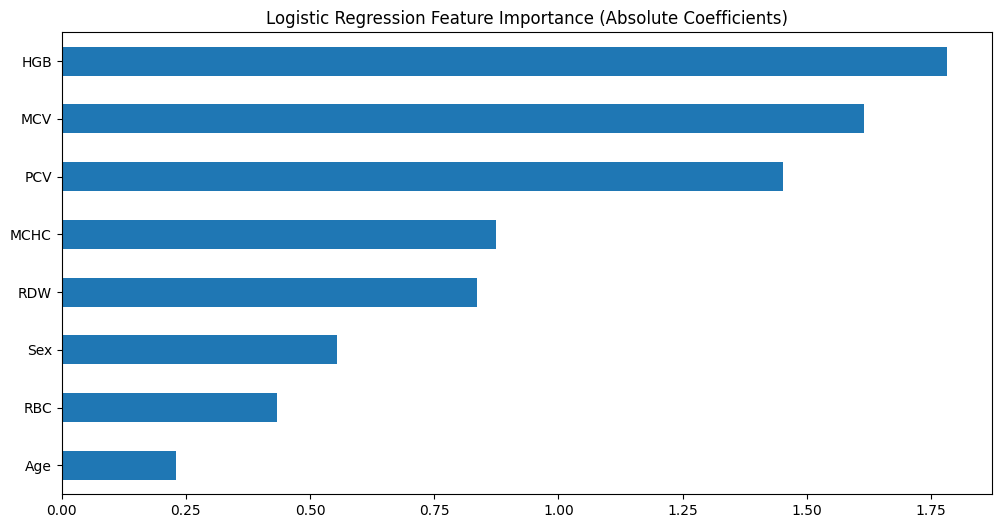

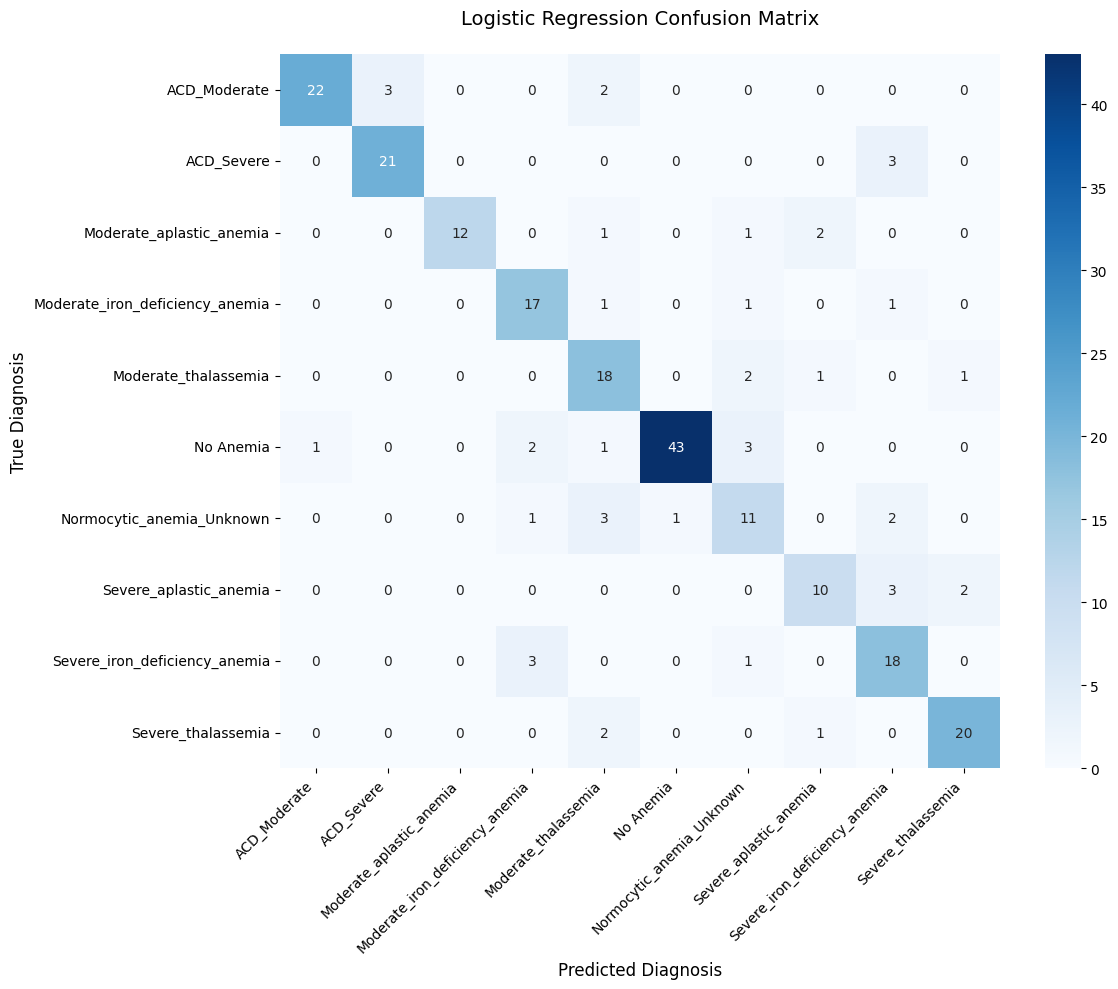

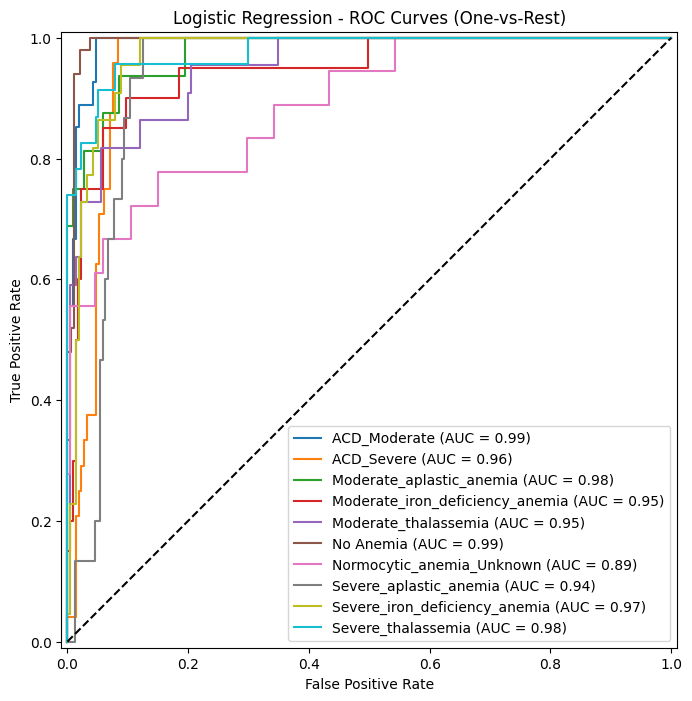


Training LightGBM
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000117 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 772
[LightGBM] [Info] Number of data points in the train set: 552, number of used features: 8
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

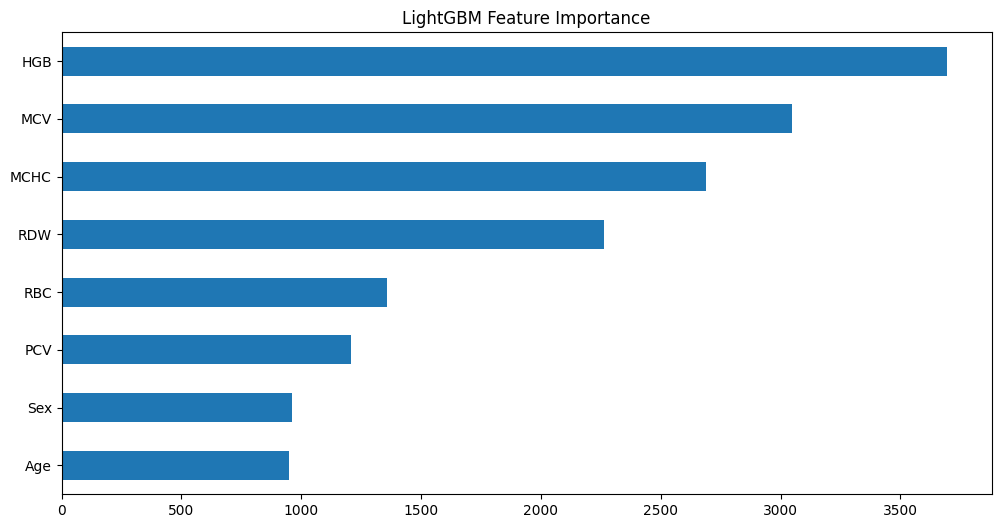

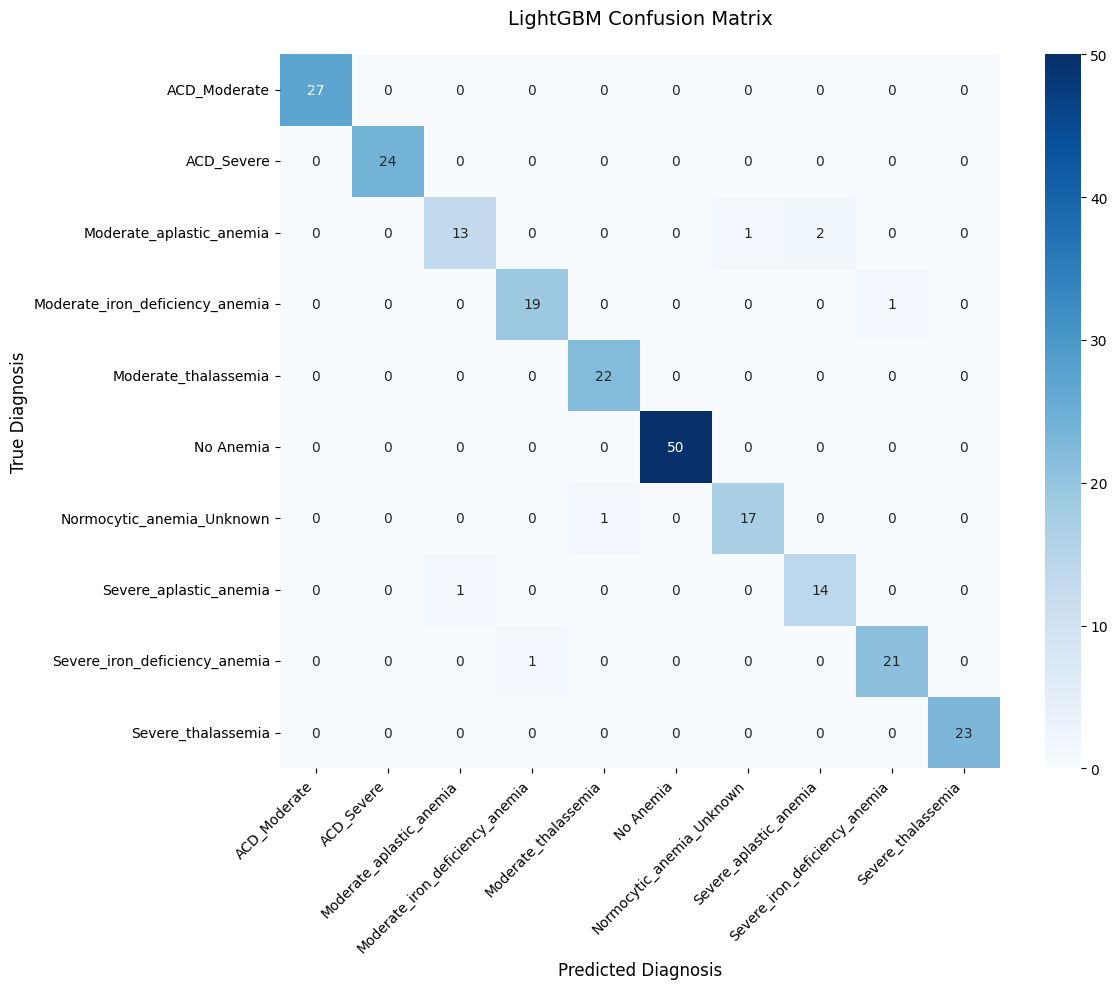

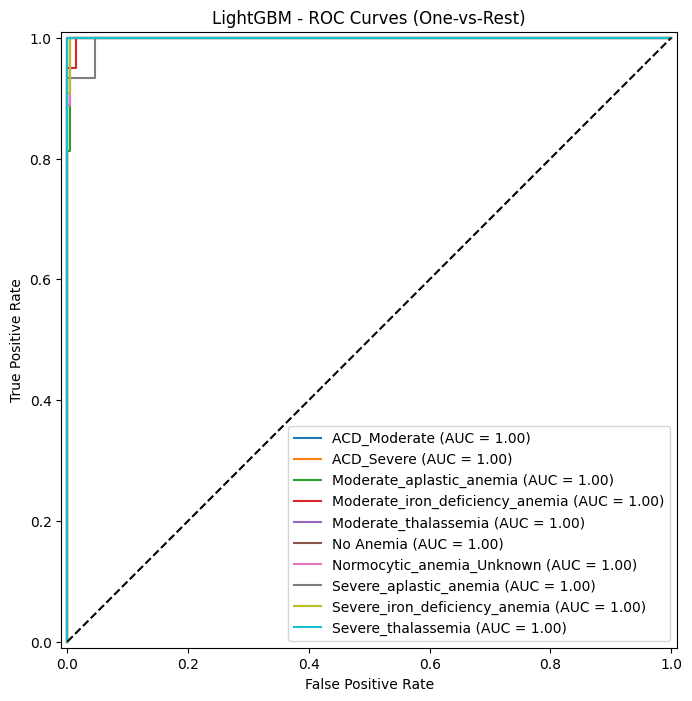


Training Gradient Boosting


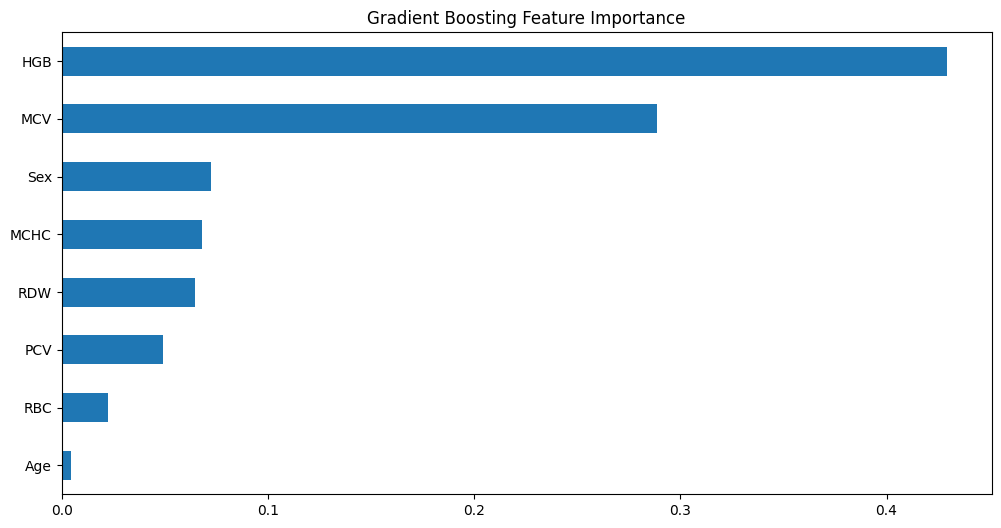

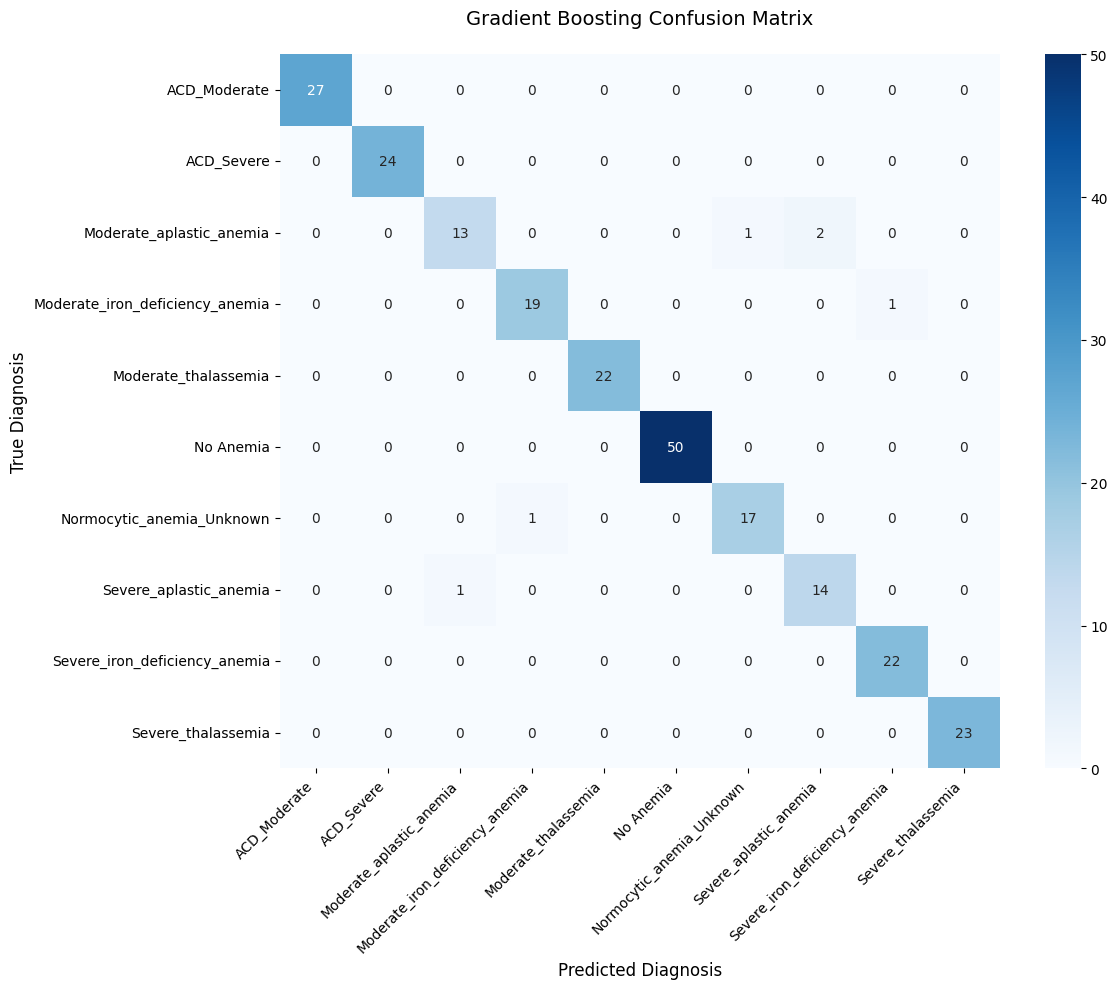

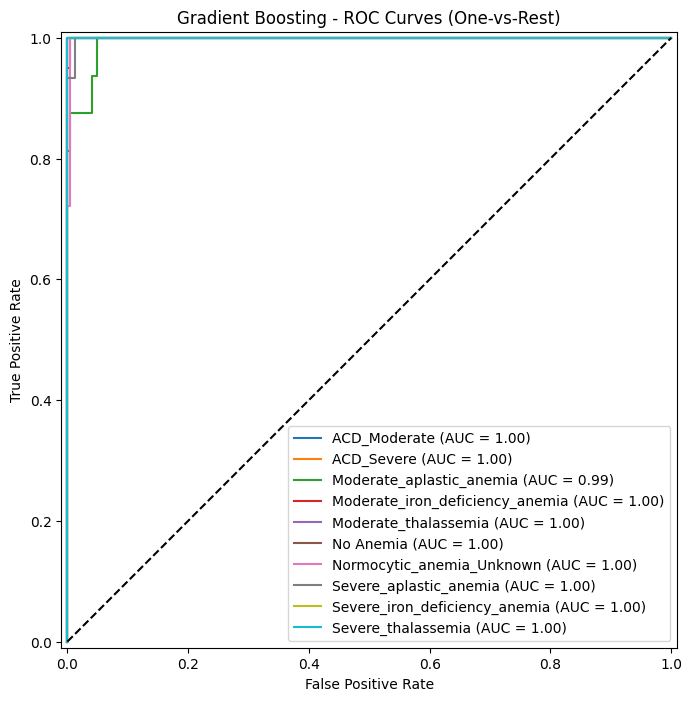


Training SVM
Feature importance not available for SVM


<Figure size 1200x600 with 0 Axes>

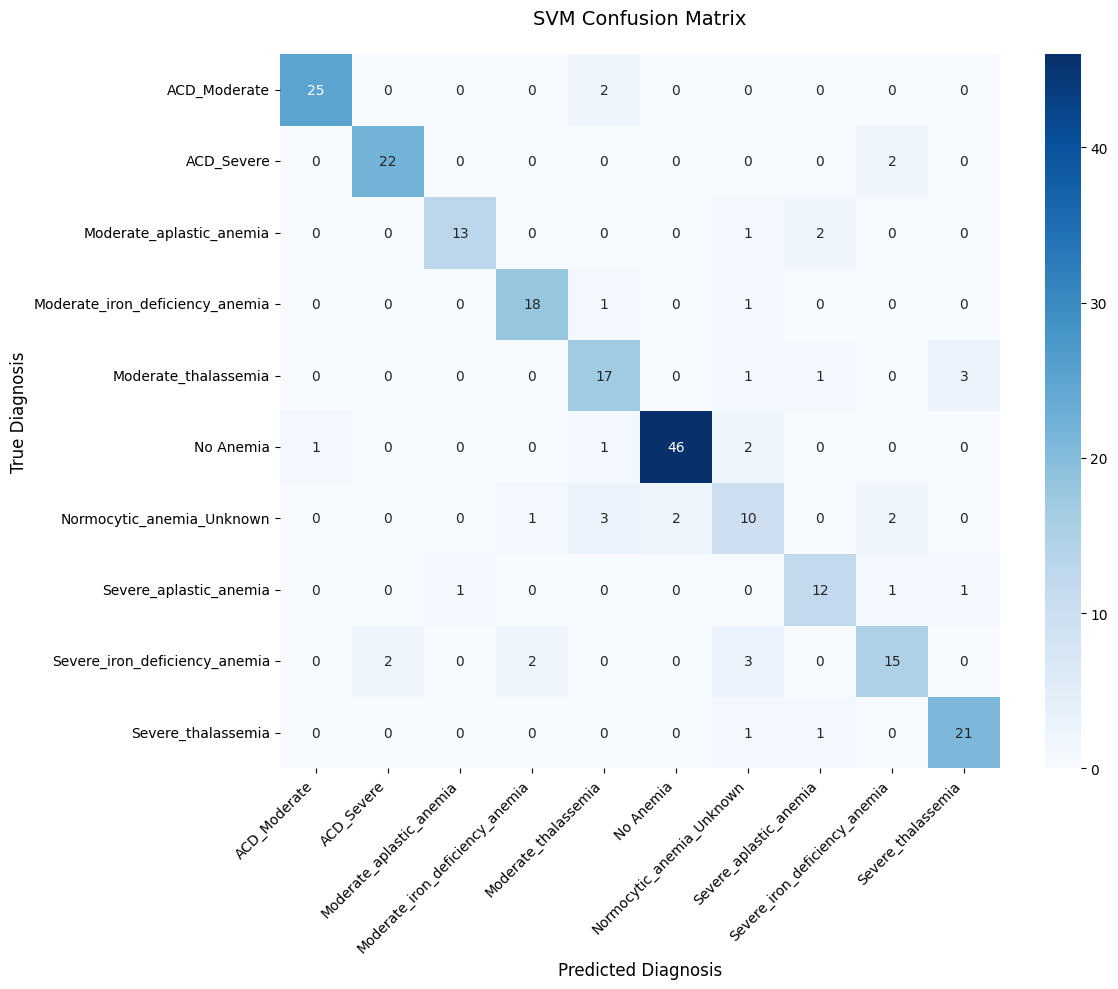

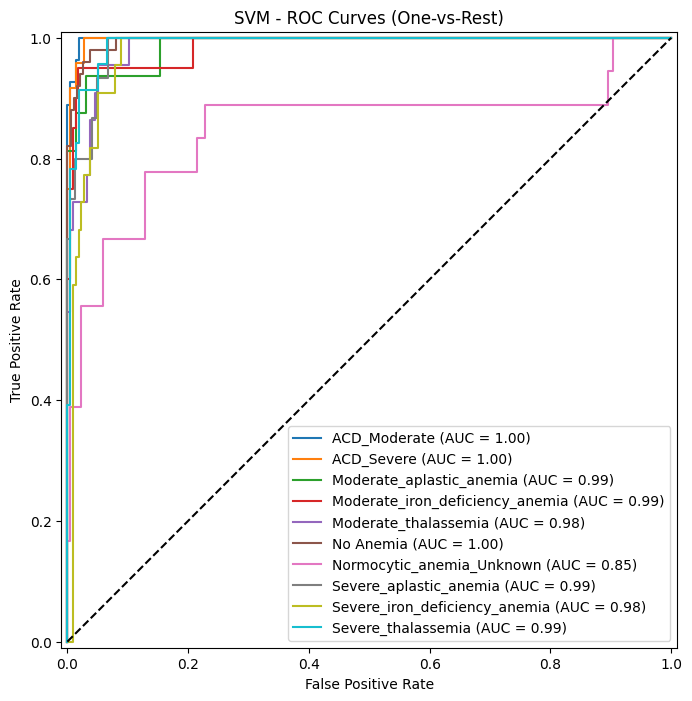


Friedman Test Results: χ²=42.433, p=0.00000
Significant differences exist between models (p < 0.05)


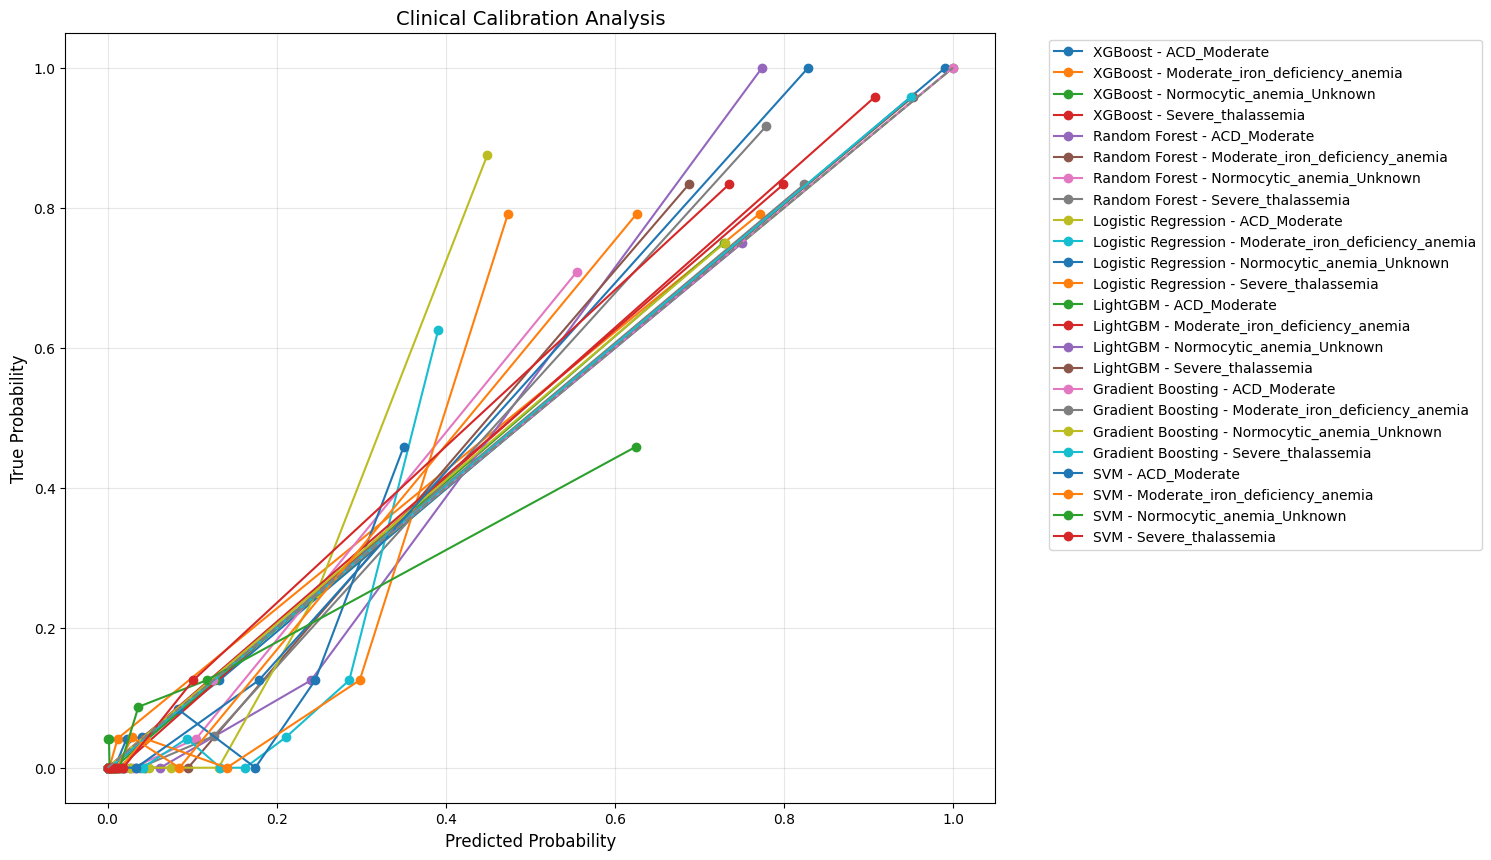

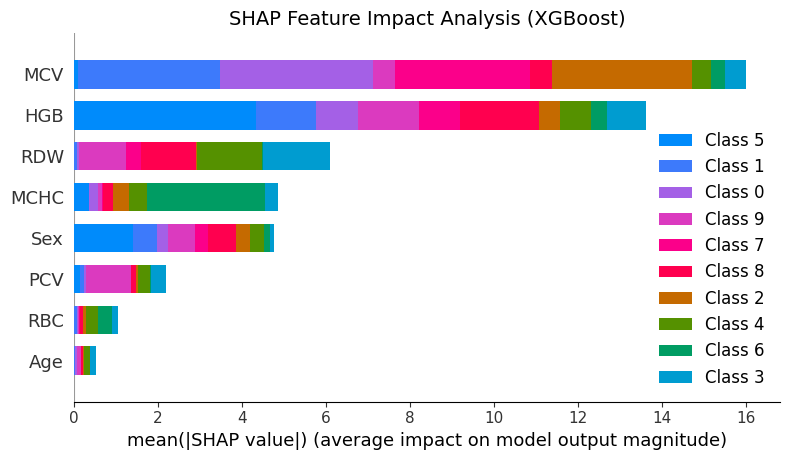

SHAP force plot failed for class ACD_Moderate: In v0.20, force plot now requires the base value as the first parameter! Try shap.plots.force(explainer.expected_value, shap_values) or for multi-output models try shap.plots.force(explainer.expected_value[0], shap_values[..., 0]).


SHAP force plot failed for class ACD_Severe: In v0.20, force plot now requires the base value as the first parameter! Try shap.plots.force(explainer.expected_value, shap_values) or for multi-output models try shap.plots.force(explainer.expected_value[0], shap_values[..., 0]).


SHAP force plot failed for class Moderate_aplastic_anemia: In v0.20, force plot now requires the base value as the first parameter! Try shap.plots.force(explainer.expected_value, shap_values) or for multi-output models try shap.plots.force(explainer.expected_value[0], shap_values[..., 0]).


<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

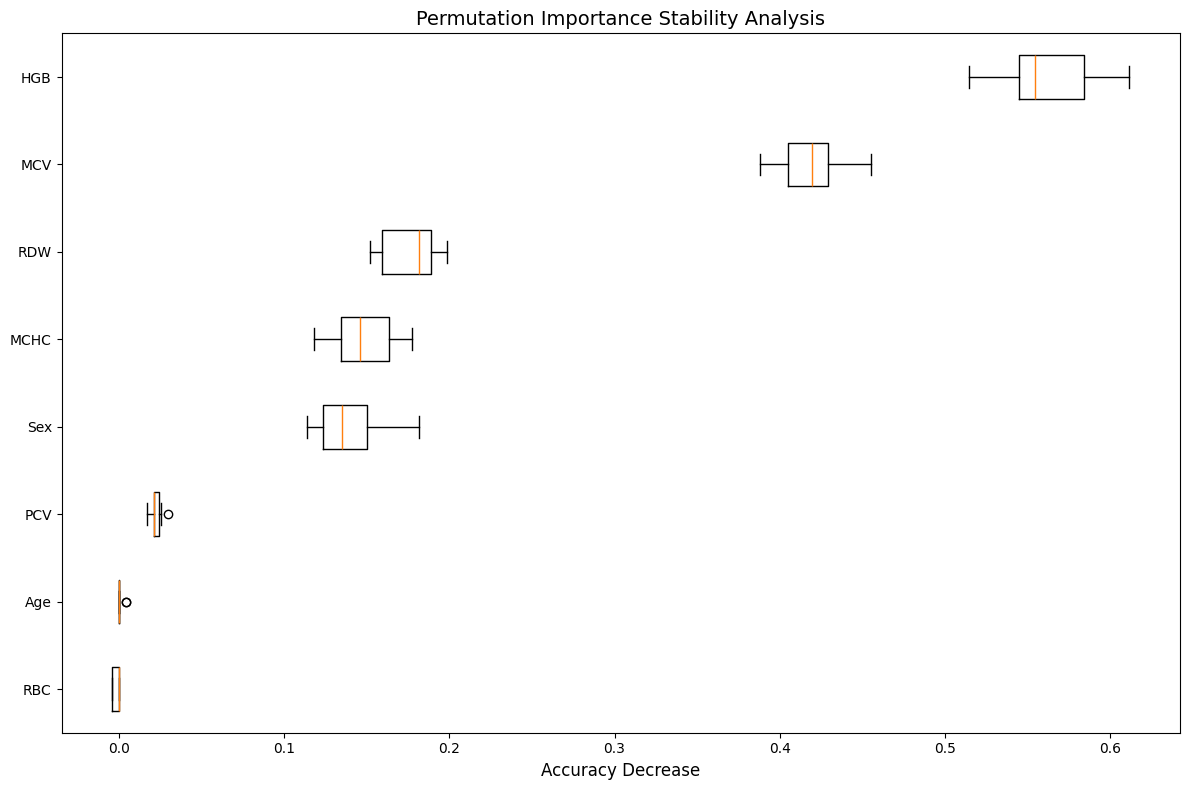


Abnormal Parameter Analysis:
      count  percentage  mean_value
HGB   537.0   68.060837    9.586592
RBC   331.0   41.951838    3.897130
MCV   292.0   37.008872   86.763014
MCHC  627.0   79.467681   26.807065
RDW   501.0   63.498099   14.035369
PCV   608.0   77.059569   20.705921

Publication-Ready Performance Table:
| Model               | Accuracy       | F1-Score       | ROC AUC        |
|:--------------------|:---------------|:---------------|:---------------|
| XGBoost             | 0.983 (±0.039) | 0.983 (±0.040) | 1.000 (±0.003) |
| Random Forest       | 0.924 (±0.039) | 0.923 (±0.041) | 0.997 (±0.002) |
| Logistic Regression | 0.810 (±0.106) | 0.815 (±0.114) | 0.965 (±0.019) |
| LightGBM            | 0.970 (±0.037) | 0.970 (±0.039) | 1.000 (±0.003) |
| Gradient Boosting   | 0.975 (±0.036) | 0.974 (±0.038) | 0.999 (±0.004) |
| SVM                 | 0.840 (±0.079) | 0.841 (±0.078) | 0.980 (±0.015) |


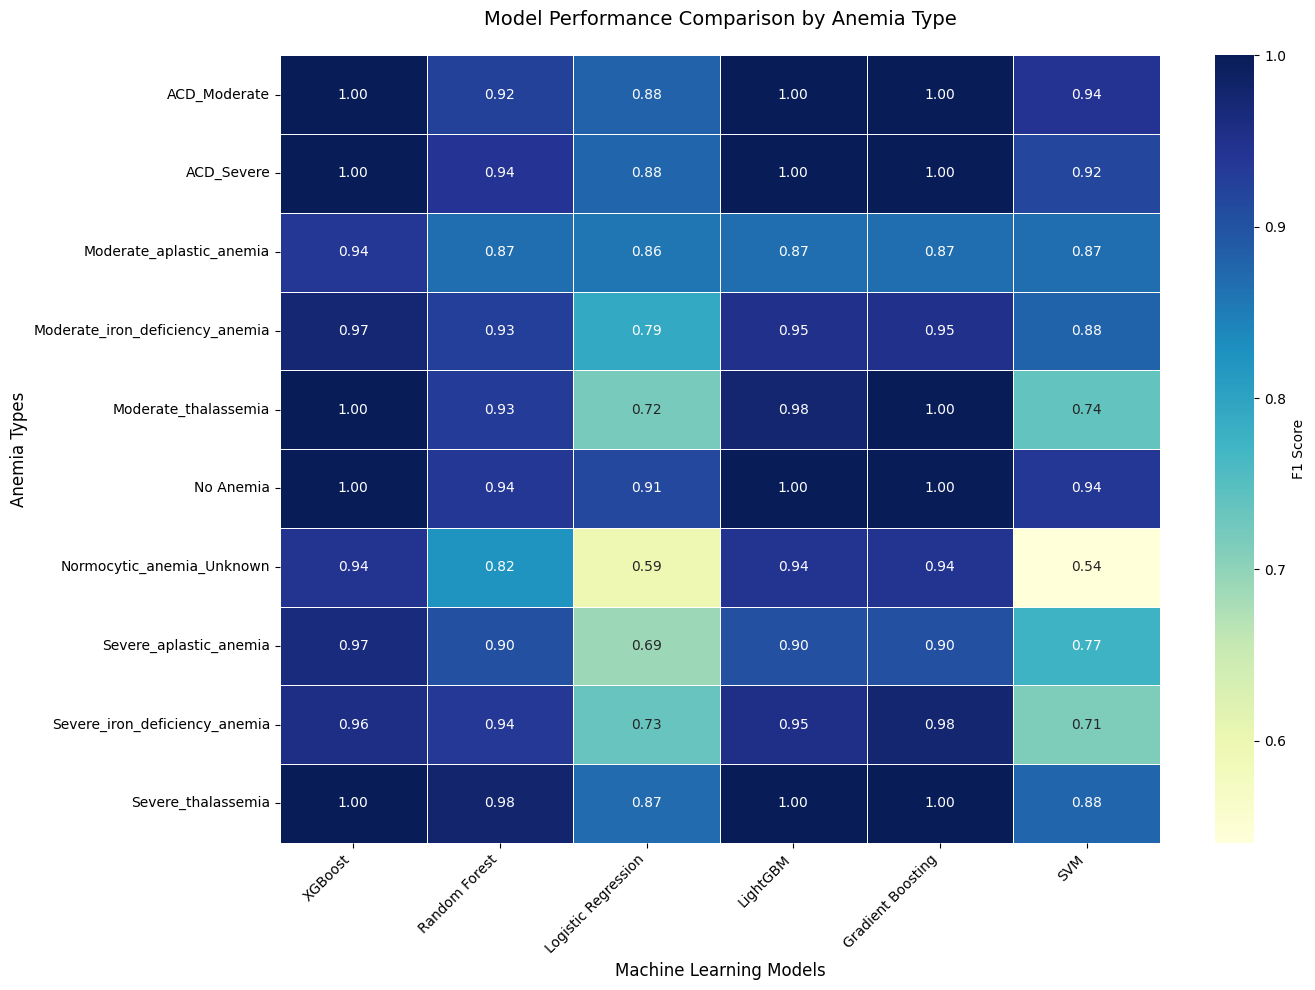

<Figure size 1600x1000 with 0 Axes>

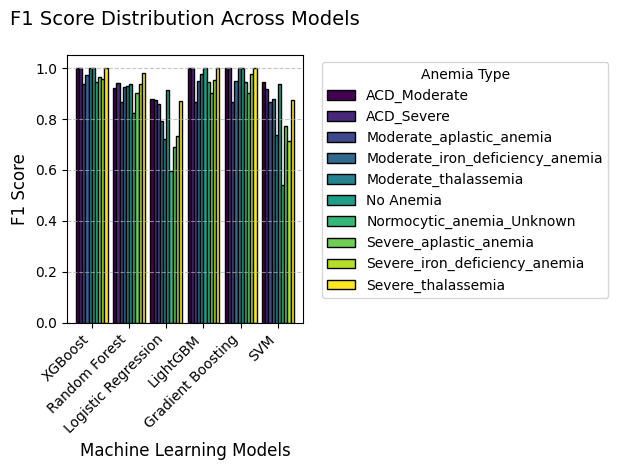

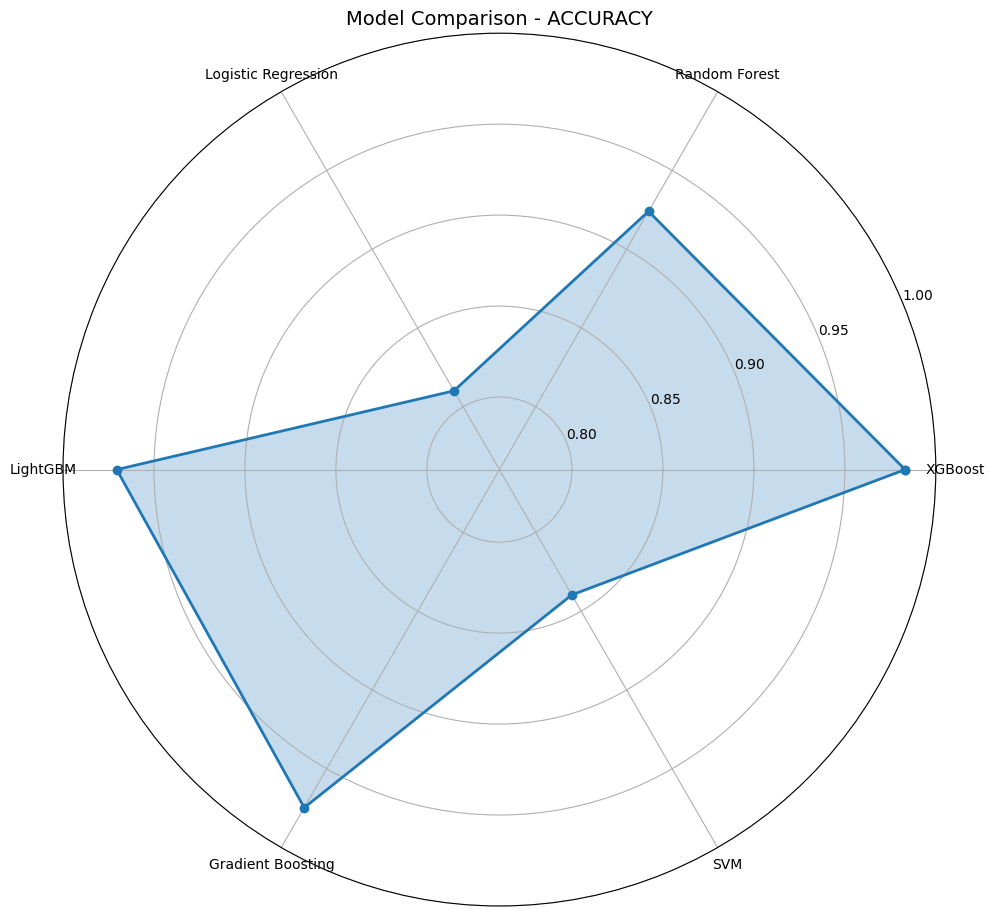

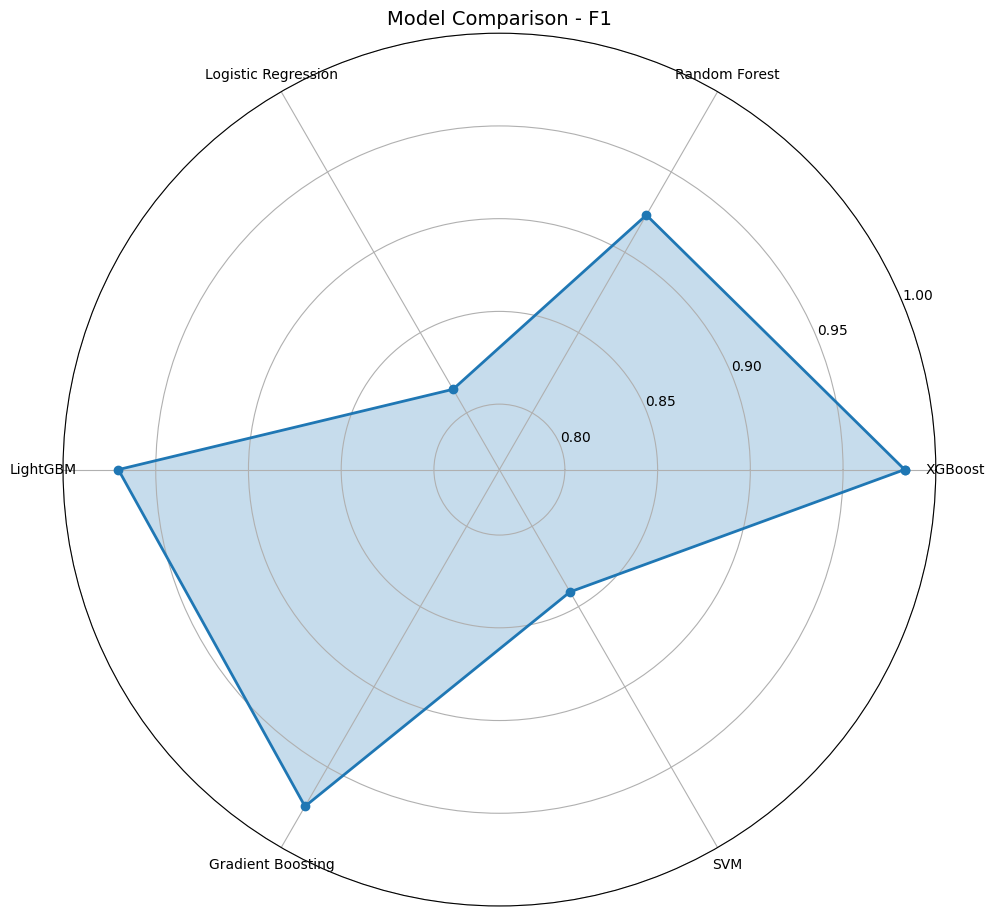

Generating learning curve for XGBoost...


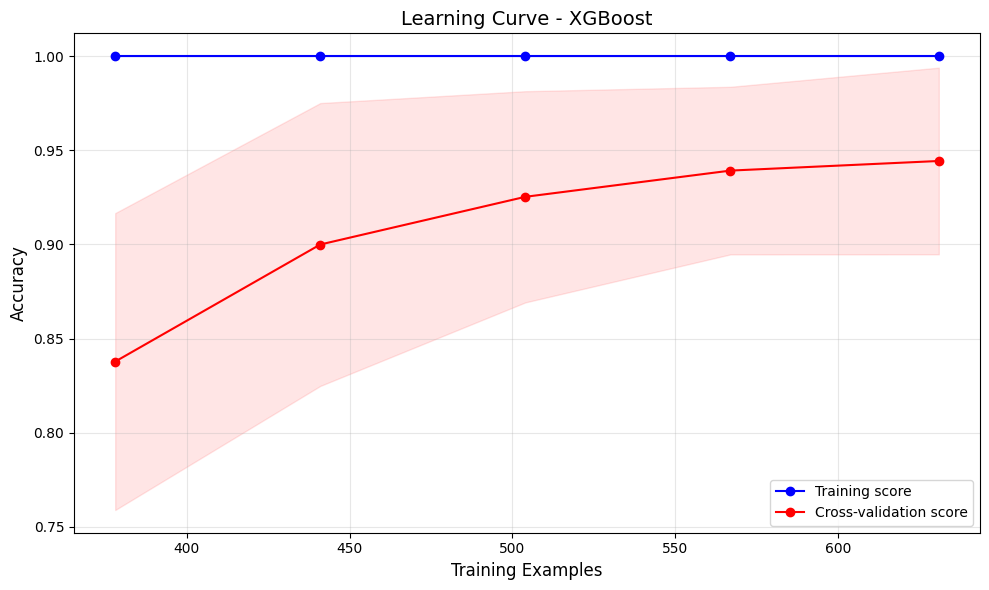

Generating learning curve for LightGBM...


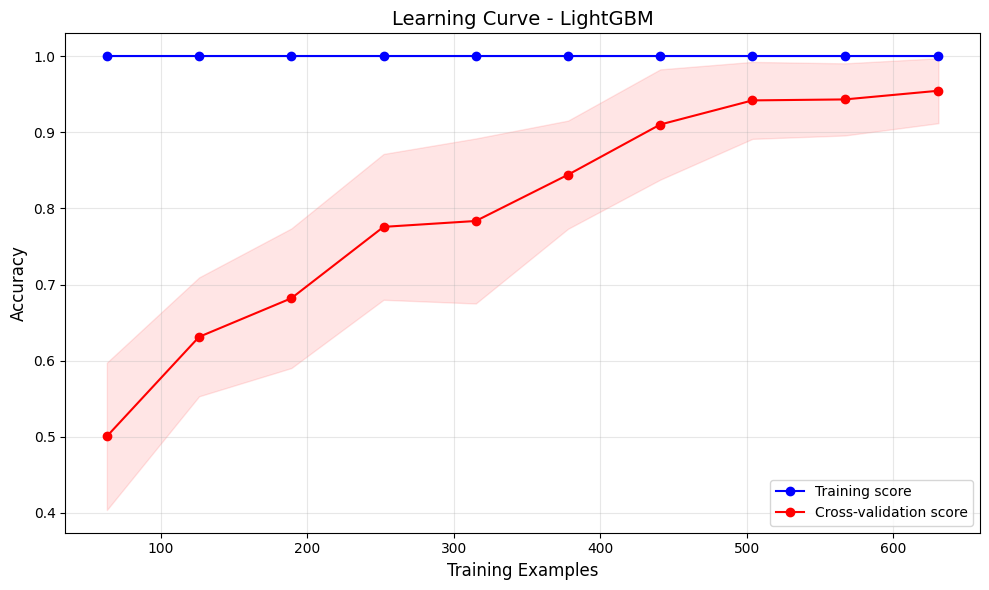

Generating learning curve for SVM...


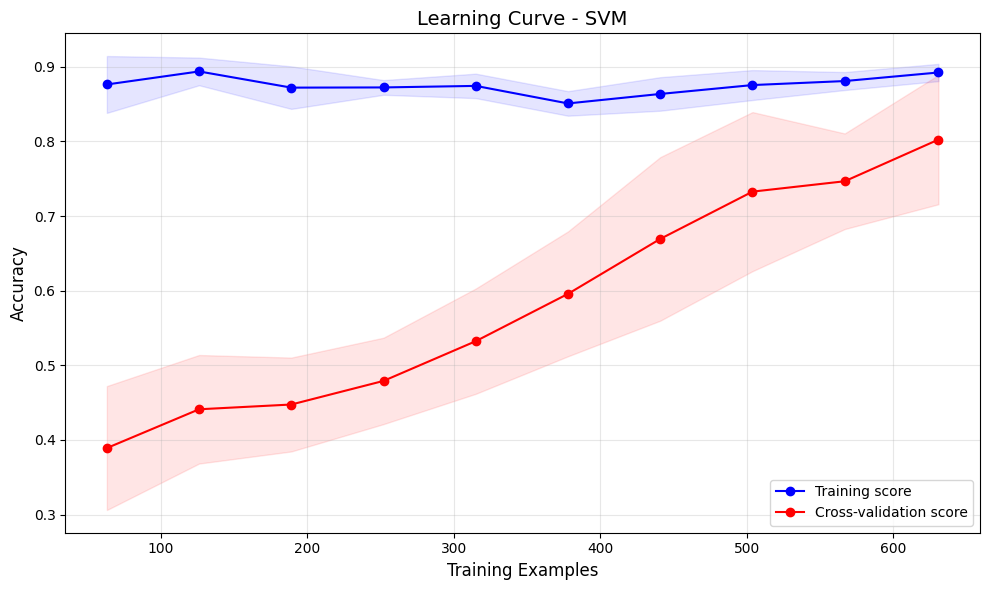

Generating learning curve for Gradient Boosting...


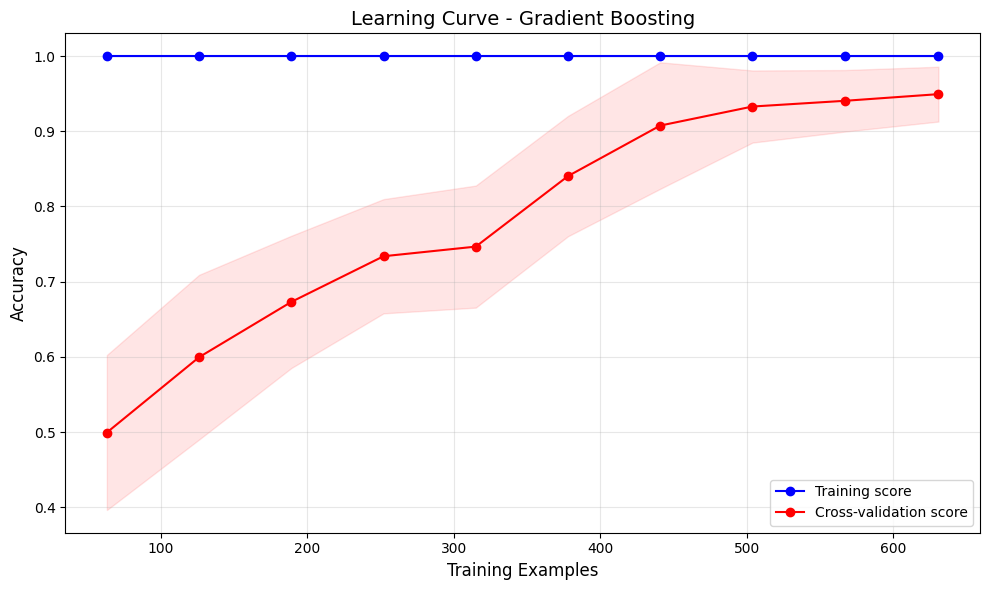

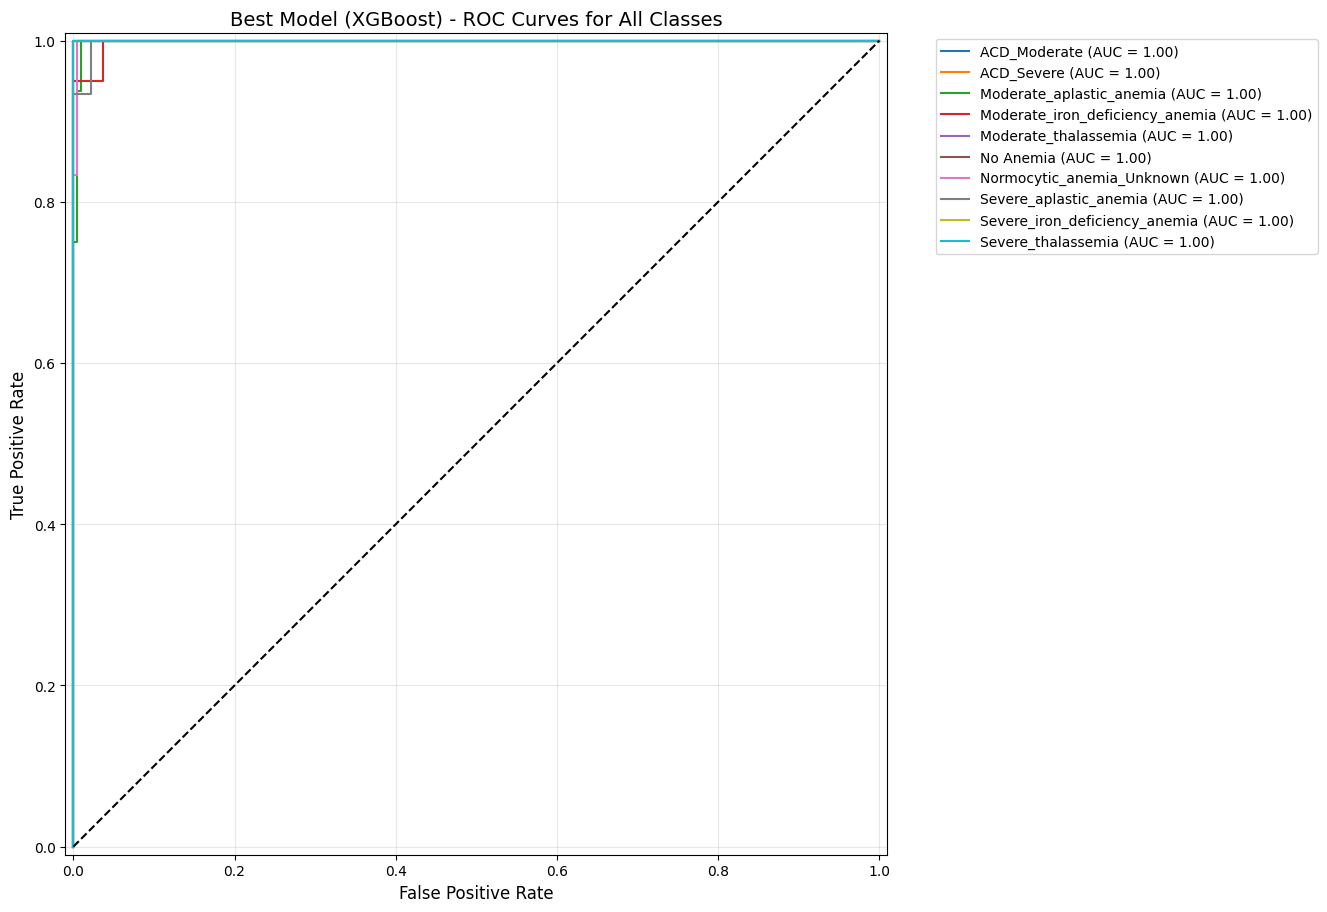

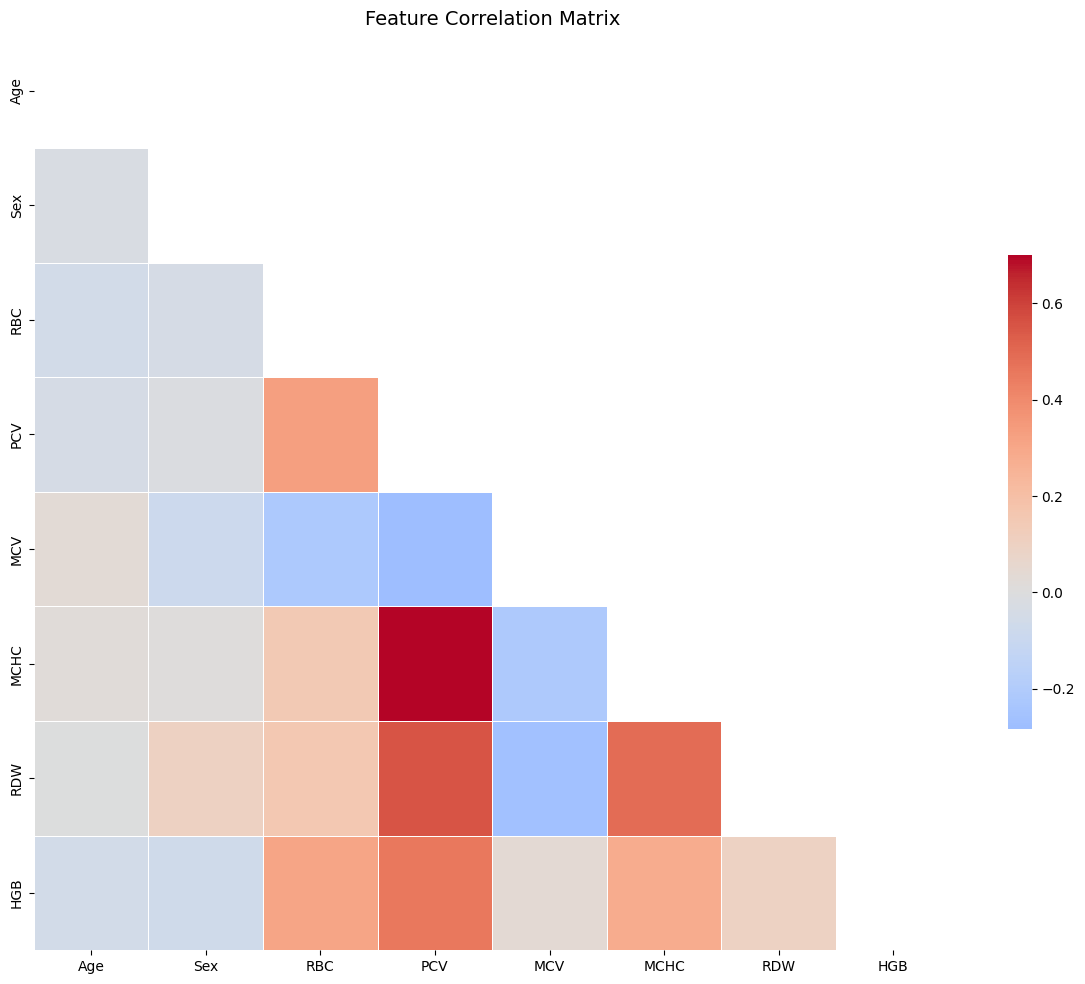


Analysis completed successfully!
Best model: XGBoost with accuracy 0.9831


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (classification_report, confusion_matrix,
                             RocCurveDisplay, roc_auc_score, accuracy_score,
                             f1_score, precision_score, recall_score, hamming_loss)
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.multioutput import MultiOutputClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance
from scipy.stats import friedmanchisquare
import shap
import joblib
import warnings
warnings.filterwarnings('ignore')

# Create plots and models directories
os.makedirs('plots', exist_ok=True)
os.makedirs('models', exist_ok=True)

# Load and clean dataset
def load_and_clean_data(filepath):
    df = pd.read_csv(filepath)
    # Standardize column names: replace spaces and periods with underscores
    df.columns = [col.strip().replace(" ", "").replace(".", "").replace("/", "per") for col in df.columns]
    df.columns = ["_".join(col.split()) for col in df.columns]
    df.columns = [col.replace("/", "per") for col in df.columns]
    # Rename PLT__per_mm3 to PLT
    if 'PLT__per_mm3' in df.columns:
        df = df.rename(columns={'PLT__per_mm3': 'PLT'})
    # Conditionally drop first row if it has invalid serial number
    serial_col = None
    for col in df.columns:
        if col.lower().startswith('s_no') or col.lower().startswith('serial'):
            serial_col = col
            break
    if serial_col and (df.iloc[0][serial_col].isna() or not isinstance(df.iloc[0][serial_col], (int, float))):
        df = df.drop(index=0).reset_index(drop=True)
    numeric_cols = ['RBC', 'PCV', 'MCV', 'MCH', 'MCHC', 'RDW', 'TLC', 'PLT', 'HGB', 'Age', 'Sex']
    df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')
    df.dropna(subset=numeric_cols, inplace=True)
    return df.reset_index(drop=True)

# Combined classification function for anemia types and additional diseases
def classify_anemia(MCV, MCHC, HGB, RDW, sex, TLC, RBC, PLT):
    labels = []
    
    # Anemia type classification (mutually exclusive)
    hgb_severe = 10 if sex == 0 else 11
    hgb_moderate = 12 if sex == 0 else 13
    if HGB >= hgb_moderate:
        labels.append('No_Anemia')
    else:
        if MCV < 80:
            cell_type = "Microcytic"
        elif 80 <= MCV <= 100:
            cell_type = "Normocytic"
        else:
            cell_type = "Macrocytic"
        if cell_type == "Microcytic":
            labels.append("ACD_Severe" if HGB < hgb_severe else "ACD_Moderate")
        elif cell_type == "Normocytic":
            if MCHC < 32:
                if HGB < hgb_severe:
                    labels.append("Severe_thalassemia" if RDW < 14.16 else "Severe_iron_deficiency_anemia")
                else:
                    labels.append("Moderate_thalassemia" if RDW < 14.16 else "Moderate_iron_deficiency_anemia")
            else:
                labels.append("Normocytic_anemia_Unknown")
        elif cell_type == "Macrocytic":
            labels.append("Severe_aplastic_anemia" if HGB < hgb_severe else "Moderate_aplastic_anemia")
        else:
            labels.append("Unknown_anemia_type")
    
    # Additional diseases (non-exclusive)
    if TLC > 11.0:
        labels.append('Infection')
    if RBC < 3.5 and TLC < 4.0 and PLT < 150.0:
        labels.append('Aplastic_Anemia_Distinct')
    if PLT < 150.0:
        labels.append('Thrombocytopenia')
    if PLT > 450.0:
        labels.append('Thrombocytosis')
    if RBC > (6.0 if sex == 1 else 5.5) or HGB > (18.0 if sex == 1 else 16.0):
        labels.append('Polycythemia')
    
    return labels

# Create multi-label target matrix
def create_multi_label_targets(df):
    required_cols = ['TLC', 'RBC', 'PLT', 'Sex', 'HGB', 'MCV', 'MCHC', 'RDW']
    for col in required_cols:
        if col not in df.columns:
            raise ValueError(f"Missing required column: {col}")
    if df[required_cols].isnull().any().any():
        raise ValueError(f"NaN values detected in required columns: {df[required_cols].isnull().sum()}")

    # Apply classify_anemia to get list of labels for each sample
    all_labels = df.apply(lambda x: classify_anemia(
        x['MCV'], x['MCHC'], x['HGB'], x['RDW'], x['Sex'], x['TLC'], x['RBC'], x['PLT']
    ), axis=1)
    
    # Get unique labels
    unique_labels = sorted(set(label for labels in all_labels for label in labels))
    
    # Create binary target matrix
    labels = pd.DataFrame(0, index=df.index, columns=unique_labels)
    for idx, sample_labels in enumerate(all_labels):
        for label in sample_labels:
            labels.loc[idx, label] = 1
    
    print("Multi-label targets head:\n", labels.head())
    return labels, unique_labels

# Feature engineering
def add_medical_features(df):
    if 'HGB' in df.columns and 'RBC' in df.columns:
        df['HGB/RBC'] = df['HGB'] / df['RBC']
    if 'RDW' in df.columns and 'MCV' in df.columns:
        df['RDW/MCV'] = df['RDW'] / df['MCV']
    return df

# Load data
print("🚀 Loading and preprocessing data...")
df = load_and_clean_data("data/cleaned_cbc_data_no_duplicates.csv")

# Debug: Print DataFrame info
print("DataFrame head:\n", df.head())
print("Missing values:\n", df.isnull().sum())

y_combined, unique_labels = create_multi_label_targets(df)
df = add_medical_features(df)

# Drop serial number column if it exists
serial_col = None
for col in df.columns:
    if col.lower().startswith('s_no') or col.lower().startswith('serial'):
        serial_col = col
        break
if serial_col:
    df = df.drop(columns=[serial_col], axis=1)

X = df.drop(columns=[col for col in df.columns if col in y_combined.columns], errors='ignore')

# Verify binary labels
assert all(y_combined[col].isin([0, 1]).all() for col in y_combined.columns), "Non-binary values detected in y_combined"

print(f"✅ Data preprocessing complete!")
print(f"📊 Features: {X.shape[1]}, Samples: {X.shape[0]}")
print(f"🎯 Target classes: {len(y_combined.columns)}")

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_combined, test_size=0.3, random_state=42)

# Model configurations
models = {
    "XGBoost": {
        'model': XGBClassifier(objective='binary:logistic', random_state=42),
        'params': {'n_estimators': [200], 'max_depth': [5], 'learning_rate': [0.1], 'subsample': [0.8], 'colsample_bytree': [0.9]}
    },
    "Random_Forest": {
        'model': RandomForestClassifier(class_weight='balanced', random_state=42, oob_score=True),
        'params': {'n_estimators': [200], 'max_depth': [None], 'min_samples_split': [2]}
    },
    "Logistic_Regression": {
        'model': Pipeline([('scaler', StandardScaler()), ('clf', LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42))]),
        'params': {'clf_C': [1], 'clf_solver': ['liblinear']}
    },
    "LightGBM": {
        'model': LGBMClassifier(objective='binary', random_state=42, class_weight='balanced'),
        'params': {'n_estimators': [200], 'num_leaves': [31], 'learning_rate': [0.1], 'subsample': [0.8], 'colsample_bytree': [0.9]}
    },
    "Gradient_Boosting": {
        'model': GradientBoostingClassifier(random_state=42),
        'params': {'n_estimators': [200], 'max_depth': [5], 'learning_rate': [0.1], 'subsample': [0.8], 'min_samples_split': [2]}
    },
    "SVM": {
        'model': Pipeline([('scaler', StandardScaler()), ('clf', SVC(probability=True, random_state=42))]),
        'params': {'clf_C': [1], 'clfgamma': ['scale'], 'clf_kernel': ['rbf']}
    }
}

# Evaluation framework
results = {}
kf = KFold(n_splits=10, shuffle=True, random_state=42)

print("\n🔧 Starting model training...")

for name, config in models.items():
    print(f"\n{'='*40}\nTraining {name} (Multi-Label)\n{'='*40}")
    model = MultiOutputClassifier(config['model'], n_jobs=1)
    model.fit(X_train, y_train)
    try:
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None
    except Exception as e:
        print(f"Prediction failed for {name}: {str(e)}")
        continue
    results[name] = {
        'model': model,
        'hamming_loss': hamming_loss(y_test, y_pred),
        'f1': f1_score(y_test, y_pred, average='weighted'),
        'f1_per_class': f1_score(y_test, y_pred, average=None),
        'precision': precision_score(y_test, y_pred, average='weighted'),
        'recall': recall_score(y_test, y_pred, average='weighted'),
        'classification_report': {}
    }
    
    print(f"✅ {name} trained successfully!")
    print(f"📊 F1-Score: {results[name]['f1']:.4f}")
    print(f"📊 Hamming Loss: {results[name]['hamming_loss']:.4f}")
    
    if y_proba is not None:
        roc_auc_scores = []
        for i, label in enumerate(y_combined.columns):
            try:
                roc_auc_scores.append(roc_auc_score(y_test.iloc[:, i], y_proba[i][:, 1]))
            except ValueError as e:
                print(f"ROC AUC failed for {label}: {str(e)}")
                roc_auc_scores.append(np.nan)
        results[name]['roc_auc'] = roc_auc_scores
        print(f"📊 Mean ROC AUC: {np.nanmean(roc_auc_scores):.4f}")

    # Cross-validation
    cv_metrics = {'test_hamming_loss': [], 'test_f1_weighted': [], 'test_roc_auc': [], 'test_accuracy': []}
    for train_idx, val_idx in kf.split(X, y_combined):
        X_cv_train, X_cv_val = X.iloc[train_idx], X.iloc[val_idx]
        y_cv_train, y_cv_val = y_combined.iloc[train_idx], y_combined.iloc[val_idx]
        model_cv = MultiOutputClassifier(config['model'], n_jobs=1)
        model_cv.fit(X_cv_train, y_cv_train)
        y_pred_cv = model_cv.predict(X_cv_val)
        cv_metrics['test_hamming_loss'].append(hamming_loss(y_cv_val, y_pred_cv))
        cv_metrics['test_f1_weighted'].append(f1_score(y_cv_val, y_pred_cv, average='weighted'))
        # Compute exact match ratio (EMR) as accuracy
        exact_matches = (y_pred_cv == y_cv_val.values).all(axis=1).mean()
        cv_metrics['test_accuracy'].append(exact_matches)
        if hasattr(model_cv, "predict_proba"):
            y_proba_cv = model_cv.predict_proba(X_cv_val)
            roc_scores = []
            for i in range(y_cv_val.shape[1]):
                try:
                    roc_scores.append(roc_auc_score(y_cv_val.iloc[:, i], y_proba_cv[i][:, 1]))
                except ValueError:
                    roc_scores.append(np.nan)
            cv_metrics['test_roc_auc'].append(np.nanmean(roc_scores))
        else:
            cv_metrics['test_roc_auc'].append(np.nan)
    results[name]['cv_hamming_loss'] = np.array(cv_metrics['test_hamming_loss'])
    results[name]['cv_f1'] = np.array(cv_metrics['test_f1_weighted'])
    results[name]['cv_roc_auc'] = np.array(cv_metrics['test_roc_auc'])
    results[name]['cv_accuracy'] = np.array(cv_metrics['test_accuracy'])

    # Confusion matrices
    for i, label in enumerate(y_combined.columns):
        plt.figure(figsize=(8, 6))
        cm = confusion_matrix(y_test.iloc[:, i], y_pred[:, i])
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
        plt.title(f'{name} Confusion Matrix ({label})')
        plt.ylabel('True')
        plt.xlabel('Predicted')
        plt.savefig(f'plots/{name}_{label}_confusion_matrix.png', bbox_inches='tight')
        plt.close()

    # Feature importance
    plt.figure(figsize=(12, 6))
    try:
        if isinstance(config['model'], Pipeline):
            estimator = config['model'].named_steps['clf']
        else:
            estimator = config['model']
        if hasattr(estimator, 'feature_importances_'):
            fi = pd.Series(estimator.feature_importances_, index=X.columns)
            fi.nlargest(15).sort_values().plot(kind='barh')
            plt.title(f'{name} Feature Importance')
        elif hasattr(estimator, 'coef_'):
            coeffs = np.abs(estimator.coef_).mean(axis=0)
            fi = pd.Series(coeffs, index=X.columns)
            fi.nlargest(15).sort_values().plot(kind='barh')
            plt.title(f'{name} Feature Importance (Absolute Coefficients)')
        plt.savefig(f'plots/{name}_feature_importance.png', bbox_inches='tight')
        plt.close()
        print(f"📈 Feature importance plot saved for {name}")
    except Exception as e:
        print(f"Feature importance visualization failed for {name}: {str(e)}")

# Statistical significance testing
print("\n📊 Performing statistical significance testing...")
model_scores = {name: results[name]['cv_f1'] for name in results}
stat, p = friedmanchisquare(*model_scores.values())
print(f"Friedman Test Results: χ²={stat:.3f}, p={p:.5f}")
if p < 0.05:
    print("✅ Significant differences exist between models (p < 0.05)")
else:
    print("❌ No significant differences between models (p ≥ 0.05)")

# Publication-ready performance table
print("\n📋 Publication-Ready Performance Table:")
table = "| Model               | Accuracy       | F1-Score       | ROC AUC        |\n"
table += "|:--------------------|:---------------|:---------------|:---------------|\n"
for name in models.keys():
    if name in results:
        mean_acc = np.mean(results[name]['cv_accuracy'])
        std_acc = np.std(results[name]['cv_accuracy'])
        mean_f1 = np.mean(results[name]['cv_f1'])
        std_f1 = np.std(results[name]['cv_f1'])
        mean_roc = np.nanmean(results[name]['cv_roc_auc'])
        std_roc = np.nanstd(results[name]['cv_roc_auc'])
        table += f"| {name:<18} | {mean_acc:.3f} (±{std_acc:.3f}) | {mean_f1:.3f} (±{std_f1:.3f}) | {mean_roc:.3f} (±{std_roc:.3f}) |\n"
print(table)

# F1 score heatmap
f1_data = {model: results[model]['f1_per_class'] for model in results}
f1_df = pd.DataFrame(f1_data, index=y_combined.columns)
plt.figure(figsize=(14, 10))
sns.heatmap(f1_df, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)
plt.title('Model Performance Comparison by Label')
plt.xlabel('Machine Learning Models')
plt.ylabel('Labels')
plt.xticks(rotation=45, ha='right')
plt.savefig('plots/f1_scores_heatmap.png', bbox_inches='tight')
plt.close()
print("📊 F1 scores heatmap saved")

# Radar chart
def radar_chart(results, metric='f1', title_suffix=''):
    models = list(results.keys())
    values = [results[model][metric] for model in models]
    angles = np.linspace(0, 2*np.pi, len(models), endpoint=False)
    values = np.concatenate((values, [values[0]]))
    angles = np.concatenate((angles, [angles[0]]))
    models = np.concatenate((models, [models[0]]))
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
    ax.plot(angles, values, 'o-', linewidth=2)
    ax.fill(angles, values, alpha=0.25)
    ax.set_thetagrids(angles[:-1] * 180/np.pi, models[:-1])
    ax.set_ylim(min(values)-0.05, 1.0)
    ax.set_title(f'Model Comparison - {metric.upper()} {title_suffix}')
    plt.savefig(f'plots/radar_chart_{metric}{title_suffix.lower().replace(" ", "")}.png', bbox_inches='tight')
    plt.close()

radar_chart(results, 'f1', 'Multi-Label')
print("📊 Radar chart saved")

# Learning curves
def plot_learning_curve(model, X, y, model_name, cv, title_suffix=''):
    from sklearn.model_selection import learning_curve
    train_sizes, train_scores, valid_scores = learning_curve(model, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=cv, scoring='f1_weighted', n_jobs=-1)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    valid_mean = np.mean(valid_scores, axis=1)
    valid_std = np.std(valid_scores, axis=1)
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
    plt.plot(train_sizes, valid_mean, 'o-', color='red', label='Cross-validation score')
    plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, alpha=0.1, color='red')
    plt.title(f'Learning Curve - {model_name} {title_suffix}')
    plt.xlabel('Training Examples')
    plt.ylabel('F1 Score (Weighted)')
    plt.legend(loc='best')
    plt.grid(True, alpha=0.3)
    plt.savefig(f'plots/learning_curve_{model_name}{title_suffix.lower().replace(" ", "")}.png', bbox_inches='tight')
    plt.close()

print("\n📈 Generating learning curves...")
for model_name in models.keys():
    if model_name in results:
        print(f"Generating learning curve for {model_name}...")
        plot_learning_curve(results[model_name]['model'], X, y_combined, model_name, cv=kf, title_suffix='Multi-Label')

# SHAP explainability (best model)
print("\n🔍 Performing SHAP analysis...")
best_model_name = max(results, key=lambda k: results[k]['f1'])
best_model = results[best_model_name]['model']
plt.figure(figsize=(14, 8))
try:
    explainer = shap.KernelExplainer(lambda x: np.array([est.predict_proba(x)[:, 1] for est in best_model.estimators_]).T, shap.sample(X_train, 100))
    shap_values = explainer.shap_values(shap.sample(X_test, 100))
    shap.summary_plot(shap_values, X_test, plot_type="bar", class_names=y_combined.columns, show=False)
    plt.title(f'SHAP Feature Impact Analysis ({best_model_name} - Multi-Label)')
    plt.savefig('plots/shap_feature_impact.png', bbox_inches='tight')
    plt.close()
    print(f"✅ SHAP analysis completed for {best_model_name}")
except Exception as e:
    print(f"❌ SHAP analysis failed: {str(e)}")

# === MODEL SAVING FOR PRODUCTION ===
print("\n💾 Saving best model for production...")

# Find the best model based on F1 score
best_model_name = max(results, key=lambda k: results[k]['f1'])
best_model = results[best_model_name]['model']

print(f"🏆 Best model: {best_model_name}")
print(f"📊 Best F1-Score: {results[best_model_name]['f1']:.4f}")

# Create model package with metadata
model_package = {
    'model': best_model,
    'metadata': {
        'features': X_train.columns.tolist(),
        'class_names': y_combined.columns.tolist(),
        'reference_ranges': {
            'HGB': [12.0, 16.0],
            'RBC': [4.0, 5.5],
            'PCV': [37.0, 47.0],
            'MCV': [80.0, 100.0],
            'MCHC': [32.0, 36.0],
            'RDW': [11.5, 14.5]
        },
        'units': {
            'HGB': 'g/dL',
            'RBC': 'million cells/μL',
            'MCV': 'fL',
            'MCHC': 'g/dL',
            'RDW': '%',
            'PCV': '%'
        },
        'version': '1.0',
        'model_type': best_model_name,
        'performance': {
            'f1_score': float(results[best_model_name]['f1']),
            'accuracy': float(np.mean(results[best_model_name]['cv_accuracy'])),
            'hamming_loss': float(results[best_model_name]['hamming_loss'])
        }
    }
}

# Save the model
model_path = 'models/Anemia_classifier_model.pkl'
joblib.dump(model_package, model_path)

print("✅ Model saved successfully!")
print(f"📁 Location: {model_path}")
print(f"🔧 Model type: {best_model_name}")
print(f"🎯 Features: {X_train.columns.tolist()}")
print(f"🏷️  Classes: {y_combined.columns.tolist()}")
print(f"📊 Performance - F1: {results[best_model_name]['f1']:.4f}, Accuracy: {np.mean(results[best_model_name]['cv_accuracy']):.4f}")

print("\n🎉 Training pipeline completed successfully!")
print("📈 All plots saved to 'plots/' directory")
print("🤖 Model saved to 'models/' directory")
print("🚀 Ready for deployment!")

In [9]:
print(X.columns.tolist())

['Age', 'Sex', 'RBC', 'PCV', 'MCV', 'MCHC', 'RDW', 'HGB']


In [7]:
# After training the best model (let's say it was XGBoost)
import joblib

# Save the model and necessary preprocessing components
# Add metadata when saving
model_package = {
    'model': best_model,
    'label_encoder': le,
    'metadata': {
        'features': X_train.columns.tolist(),
        'class_names': le.classes_.tolist(),
        'reference_ranges': {
            'HGB': [12.0, 16.0],
            'RBC': [4.0, 5.5],
            'PCV': [37.0, 47.0],
            'MCV': [80.0, 100.0],
            'MCHC': [32.0, 36.0],
            'RDW': [11.5, 14.5]              # Encoded valuess
        },
        'units': {
            'HGB': 'g/dL',
            'RBC': 'million cells/μL',
            'MCV': 'fL',
            'MCHC': 'g/dL',
            'RDW': '%',
            'PCV': '%'
        }
    }
}

joblib.dump(model_package, 'Anemia_classifier_model.pkl')

['Anemia_classifier_model.pkl']